<a href="https://colab.research.google.com/github/chris20834/AI-Summer-Camp/blob/main/CNN_%E8%A1%A8%E6%83%85%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64
Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


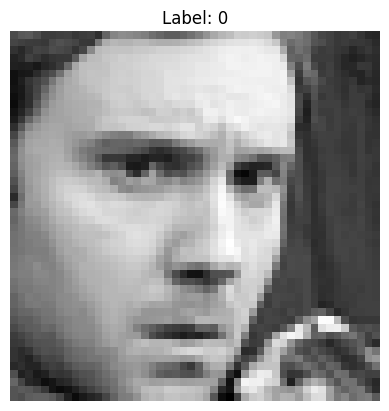

In [21]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. 讀取 CSV 檔案 下載網址"https://www.kaggle.com/datasets/deadskull7/fer2013"
data = pd.read_csv('fer2013.csv')
print(data.head())

# 2. 分析欄位分布
print(data['emotion'].value_counts())
print(data['Usage'].value_counts())

# 3. 定義前處理函式
def preprocess_data(df, usage):
    df_usage = df[df['Usage'] == usage]
    if df_usage.empty:
        return np.array([]), np.array([])
    pixels = df_usage['pixels'].tolist()

    # 將像素字串轉為 numpy array
    X = np.array([np.fromstring(p, sep=' ') for p in pixels], dtype='float32')
    X = X.reshape(-1, 48, 48, 1) / 255.0  # 正規化
    y = to_categorical(df_usage['emotion'], num_classes=7)
    return X, y

# 4. 分別處理訓練與測試資料
X_train, y_train = preprocess_data(data, 'Training')
X_val, y_val = preprocess_data(data, 'PrivateTest')

# 5. 顯示其中一張圖片
plt.imshow(X_train[0].reshape(48, 48), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.axis('off')
plt.show()

In [22]:
# 開始訓練模型
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64
)

Epoch 1/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5206 - loss: 1.2631
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5430 - loss: 1.2065
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5561 - loss: 1.1699


Predicted probabilities:
Angry     : 0.1%
Disgust   : 0.0%
Fear      : 0.1%
Happy     : 99.3%
Sad       : 0.1%
Surprise  : 0.1%
Neutral   : 0.3%


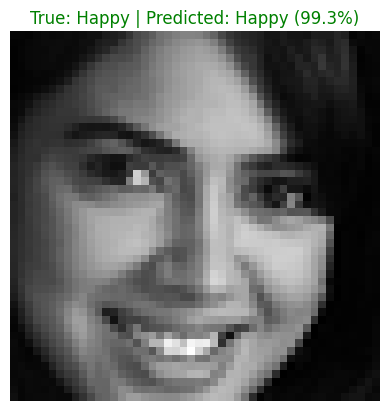

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 定義表情對應標籤
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# 隨機選一筆驗證資料
if len(X_val) > 0:
    index = np.random.randint(0, len(X_val))
    image = X_val[index]
    true_label = np.argmax(y_val[index])

    # 使用模型進行預測
    prediction = model.predict(image.reshape(1, 48, 48, 1), verbose=0)
    predicted_label = np.argmax(prediction)
    confidence = prediction[0][predicted_label] * 100
    # 印出每一類別的機率
    print("Predicted probabilities:")
    for i, prob in enumerate(prediction[0]):
        print(f"{emotion_labels[i]:<10}: {prob * 100:.1f}%")

    # 結果顏色：預測正確為綠色，錯誤為紅色
    color = 'green' if predicted_label == true_label else 'red'

    # 顯示圖片與標籤
    plt.imshow(image.reshape(48, 48), cmap='gray')
    plt.title(f"True: {emotion_labels[true_label]} | Predicted: {emotion_labels[predicted_label]} ({confidence:.1f}%)",
              color=color)
    plt.axis('off')
    plt.show()

else:
    print("No validation data to display.")

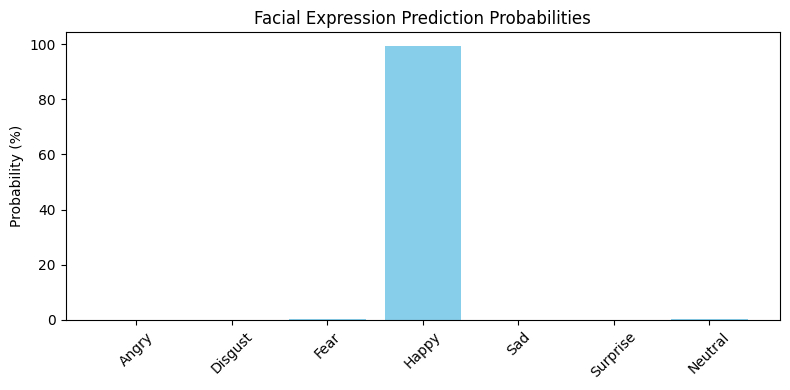

In [33]:
# 繪製預測機率長條圖
if 'prediction' in locals() and prediction is not None:
    plt.figure(figsize=(8, 4))
    plt.bar(emotion_labels, prediction.flatten() * 100, color='skyblue')
    plt.ylabel("Probability (%)")
    plt.title("Facial Expression Prediction Probabilities")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No prediction data to plot.")